# Sensitivity analysis for the  receptor model (Ra as output)

# Receptor model (Ra as output)

$$\frac{\mathrm{d} R_{r}}{\mathrm{d} t} =  k_{i}R_{i} -k_{r}*S*R_{r}$$

$$\frac{\mathrm{d} R_{i}}{\mathrm{d} t} = k_{a}R_{a}   +k_{Ma}*M_{2}*R_{a} - k_{i}R_{i}$$

$$\frac{\mathrm{d} R_{a}}{\mathrm{d} t} = k_{r}*S*R_{r}  -k_{Ma}*M_{2}*R_{a} - k_{a}R_{a} $$

$$\frac{\mathrm{d} I_{2}}{\mathrm{d} t} = k_{Ia2}*R_{a}*(1-I_{2})-k_{Ii2}I_{2}$$

$$\frac{\mathrm{d} M_{2}}{\mathrm{d} t} = k_{Ma2}*R_{2}*(1-M_{2})-k_{Mi2}M_{2}$$


$$\frac{\mathrm{d} R_{2}}{\mathrm{d} t} = k_{Ra2}*I_{2}*(1-R_{2})-k_{Ri2}R_2$$

$$\dot{R_r} = k_{a}R_a + k_{FB}C_3R_a - k_{r}R_r   \nonumber \\
        \dot{R_i} = k_{r}R_r - \mathrm{SQW}(t) \times k_{i}R_i  \nonumber \\
        \dot{R_a} = \mathrm{SQW}(t) \times k_{i}R_i - k_{FB}C_3R_a - k_{a}R_a\\
        \dot{C_1} = R_a \times k_{a1}(1-C_1) - k_{i1}C_1   \nonumber \\
        \dot{C_2} = C_1 \times k_{a2}(1-C_2) - k_{i2}C_2 \nonumber\\
        \dot{C_3} = C_2 \times k_{a3}(1-C_3) - k_{i3}C_3 \nonumber$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        e=line.strip()
        col=line.split()
        data.append(col)	
    return data

In [3]:
data=ldata("sensitivity_receptor_Ra.txt")
data_float=[]
for i in data:
  data_float.append([float(i[0]), float(i[1])])

In [4]:
positive_data = []
negative_data = []
for i in data_float:
    positive_data.append(i[0])
    negative_data.append(i[1])

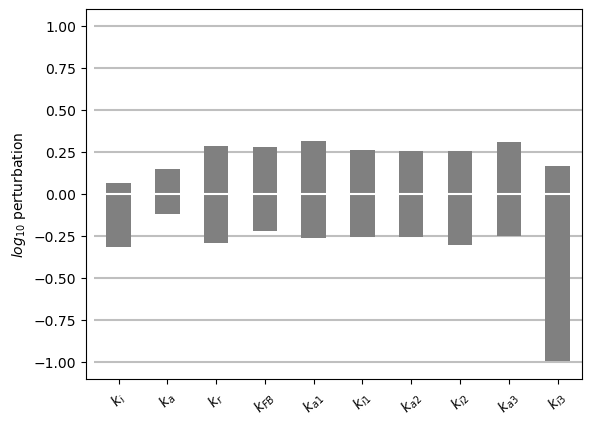

In [5]:
# some example data
threshold = 0.0

#x= [r"$k_{r}$", r"$k_{a}$", r"$k_{i}$", r"$k_{Ma}$",r"$k_{Ia2}$",r"$k_{Ii2}$",r"$k_{Ra2}$",r"$k_{Ri2}$",r"$k_{Ma2}$",r"$k_{Mi2}$"]
x= [r"$k_{i}$", r"$k_{a}$", r"$k_{r}$", r"$k_{FB}$",r"$k_{a1}$",r"$k_{i1}$",r"$k_{a2}$",r"$k_{i2}$",r"$k_{a3}$",r"$k_{i3}$"]


# and plot it
fig, ax = plt.subplots()

ax.bar(x, negative_data, width=0.5, color='grey')
ax.bar(x, positive_data, width=0.5, color='grey')

# horizontal line indicating the threshold
ax.plot([-0.5, 12.5], [threshold, threshold], 'w', lw="1.5")
plt.hlines(0.25, -0.5, 10.5, color='grey', alpha=0.5)
plt.hlines(0.5, -0.5, 10.5, color='grey', alpha=0.5)
plt.hlines(0.75, -0.5, 10.5, color='grey', alpha=0.5)
plt.hlines(1.0, -0.5, 10.5, color='grey', alpha=0.5)
plt.hlines(-0.25, -0.5, 10.5, color='grey', alpha=0.5)
plt.hlines(-0.5, -0.5, 10.5, color='grey', alpha=0.5)
plt.hlines(-0.75, -0.5, 10.5, color='grey', alpha=0.5)
plt.hlines(-1.0, -0.5, 10.5, color='grey', alpha=0.5)
plt.xticks(rotation = 45)
plt.ylabel(r"$log_{10}$ perturbation")
plt.xlim((-0.670,9.5))
plt.show()